In [1]:

import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mojzi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import os
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\Users\mojzi\AppData\Local\Continuum\anaconda3\envs\myenv1\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


#Lines with titles preparation

In [2]:
#with open('data_connected_graph.jsonl') as f:
#    a = []
#    for line in f.readlines():
#        dic = json.loads(line)
#        a.append(dic)

In [5]:
#for i in a:
#    if "\n" in i["title"]:
#        print("+")

In [6]:
#with open('titles_collection.txt','w', encoding="utf-8") as outfile:
#    for i in a:
#        outfile.write(i["title"] + "\n")

## stop words

In [3]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [4]:
data = document = open(os.path.join('titles_collection.txt'), encoding="utf-8").readlines()

In [5]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['interferring', 'discourse', 'relations', 'in', 'context']]


In [6]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

C:\Users\mojzi\AppData\Local\Continuum\anaconda3\envs\myenv1\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['interferring', 'discourse', 'relations', 'in', 'context']


In [7]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [9]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['interferr', 'discourse', 'relation', 'context']]


## Adding stop words

In [12]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
print(len(id2word))
# remove useless tokens
#list_of_ids_to_remove = [id2word.token2id[tok] for tok in 'research,use,show,paper,model,base,result,method,approach,propose,problem,algorithm,present,datum,also,new,experiment,provide,work,good,demonstrate,improve,give,first,different,novel,achieve,however,many,well,introduce,art'.split(',')]
#id2word.filter_tokens(list_of_ids_to_remove)
print(len(id2word))
# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

6277
6277
[[(0, 1), (1, 1), (2, 1), (3, 1)]]


In [13]:
i_f_tuples = list(id2word.dfs.items())

In [14]:
i_f_tuples_sorted = sorted(i_f_tuples, key=lambda x:x[1], reverse = True)


In [19]:
for i, f in i_f_tuples_sorted[:100]:
    print(id2word[i])

learn
task
system
set
performance
feature
information
language
state
word
large
machine
learning
structure
time
number
describe
analysis
technique
study
framework
domain
apply
make
training
text
function
exist
process
application
order
perform
compare
several
representation
find
semantic
outperform
high
dataset
develop
consider
evaluation
include
accuracy
space
simple
experimental
previous
classification
require
evaluate
combine
translation
sentence
efficient
knowledge
obtain
train
generate
allow
class
corpus
solve
natural
may
example
general
level
english
linear
non
important
test
network
address
statistical
multiple
standard
significantly
context
case
label
often
search
solution
distribution
human
represent
way
automatically
term
identify
focus
know
measure
inference
challenge
call
type


In [ ]:
#from gensim.models.wrappers import LdaMallet

In [16]:
os.environ.update({'MALLET_HOME':r'C:/Users/mojzi/OneDrive/Documents/Citacnisit/mallet-2.0.8/mallet-2.0.8/'})

## Add Mallet path

In [61]:
mallet_path = "C:/Users/mojzi/OneDrive/Documents/Citacnisit/mallet-2.0.8/mallet-2.0.8/bin/mallet.bat" # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=26, id2word=id2word)

# Coherence values

In [39]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=20, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [57]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=22, limit=30, step=1)

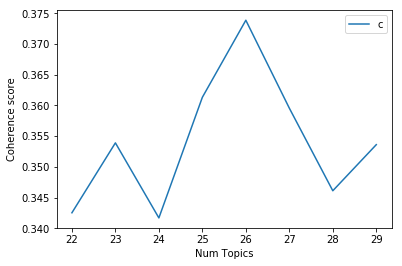

In [59]:
# Show graph
limit=30; start=22; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [60]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 22  has Coherence Value of 0.3425
Num Topics = 23  has Coherence Value of 0.3539
Num Topics = 24  has Coherence Value of 0.3417
Num Topics = 25  has Coherence Value of 0.3613
Num Topics = 26  has Coherence Value of 0.3739
Num Topics = 27  has Coherence Value of 0.3596
Num Topics = 28  has Coherence Value of 0.3461
Num Topics = 29  has Coherence Value of 0.3536


# -----------------------------------------------


In [62]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(21,
  [('dependency', 0.10363086232980333),
   ('parse', 0.10173978819969742),
   ('tree', 0.08434190620272315),
   ('recognition', 0.06429652042360061),
   ('syntactic', 0.052571860816944024),
   ('joint', 0.04387291981845688),
   ('base', 0.03744326777609682),
   ('parser', 0.03555219364599092),
   ('speech', 0.034417549167927386),
   ('parsing', 0.033661119515885025)]),
 (25,
  [('inference', 0.09856422196352348),
   ('algorithm', 0.07489328676755917),
   ('probabilistic', 0.07256499805975941),
   ('fast', 0.04346138921226232),
   ('sample', 0.039968956150562666),
   ('bayesian', 0.03686457120682965),
   ('application', 0.03647652308886302),
   ('process', 0.034924330616996506),
   ('datum', 0.02910360884749709),
   ('variational', 0.025611175785797437)]),
 (15,
  [('datum', 0.09803921568627451),
   ('kernel', 0.08958093041138024),
   ('sparse', 0.0457516339869281),
   ('gaussian_process', 0.040369088811995385),
   ('regression', 0.03575547866205306),
   ('robust', 0.0334486735870

In [63]:
from gensim.models.ldamodel import LdaModel
import numpy

def ldaMalletConvertToldaGen(mallet_model):
    model_gensim = LdaModel(
    id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
    alpha=mallet_model.alpha, eta=0, iterations=1000,
    gamma_threshold=0.001,
    dtype=numpy.float32
    )
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

In [64]:
# transform the mallet Lda model to gensim Lda model
gensim_model = ldaMalletConvertToldaGen(ldamallet)

In [67]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(gensim_model, corpus, id2word)
vis

C:\Users\mojzi\AppData\Local\Continuum\anaconda3\envs\myenv1\lib\site-packages\pyLDAvis\_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
C:\Users\mojzi\AppData\Local\Continuum\anaconda3\envs\myenv1\lib\site-packages\pyLDAvis\_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
C:\Users\mojzi\AppData\Local\Continuum\anaconda3\envs\myenv1\lib\site-packages\pyLDAvis\_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
C:\Users\mojzi\AppData\Local\Continuum\anaconda3\envs\myenv1\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=Tru

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
4     -0.034332  0.027906       1        1  3.929351
11     0.032094 -0.018313       2        1  3.877948
24     0.026789  0.020377       3        1  3.862791
20     0.037322 -0.013326       4        1  3.860407
7      0.063624  0.300887       5        1  3.860152
21     0.059974  0.205286       6        1  3.860116
13     0.017576 -0.012746       7        1  3.858333
14    -0.112388 -0.033717       8        1  3.854448
8     -0.258787 -0.103628       9        1  3.854182
17    -0.000218  0.014206      10        1  3.852351
2      0.105790 -0.091660      11        1  3.851645
1     -0.035453  0.047152      12        1  3.841795
19    -0.043780 -0.024104      13        1  3.839549
18     0.016876 -0.015853      14        1  3.839099
9      0.260819 -0.198027      15        1  3.836932
25    -0.061386 -0.035631      16        1  3.836883
5      0.001107  0.001162      17        1  3.836272
10     0.115036  0.212717      18        1  3.835036
3     -0.083191 -0.033833      19        1  3.832578
15     0.026559 -0.046242      20        1  3.831430
16    -0.044777 -0.009196      21        1  3.831231
22    -0.008571  0.133140      22        1  3.831016
23    -0.046569 -0.003865      23        1  3.823507
0     -0.252907 -0.096241      24        1  3.823337
6      0.238725 -0.211313      25        1  3.821683
12    -0.019933 -0.015136      26        1  3.817924, topic_info=     Category         Freq                Term        Total  loglift  logprob
38    Default  1298.000000               model  1298.000000  30.0000  30.0000
27    Default  1107.000000                base  1107.000000  29.0000  29.0000
15    Default  1183.000000               learn  1183.000000  28.0000  28.0000
24    Default   647.000000            learning   647.000000  27.0000  27.0000
39    Default   614.000000         translation   614.000000  26.0000  26.0000
170   Default   575.000000                word   575.000000  25.0000  25.0000
292   Default   545.000000            semantic   545.000000  24.0000  24.0000
37    Default   534.000000             machine   534.000000  23.0000  23.0000
43    Default   516.000000            language   516.000000  22.0000  22.0000
78    Default   489.000000             network   489.000000  21.0000  21.0000
106   Default   418.000000             feature   418.000000  20.0000  20.0000
205   Default   393.000000               multi   393.000000  19.0000  19.0000
33    Default   390.000000                text   390.000000  18.0000  18.0000
53    Default   372.000000            analysis   372.000000  17.0000  17.0000
130   Default   361.000000      classification   361.000000  16.0000  16.0000
321   Default   427.000000            approach   427.000000  15.0000  15.0000
271   Default   297.000000          extraction   297.000000  14.0000  14.0000
145   Default   376.000000              system   376.000000  13.0000  13.0000
80    Default   288.000000              search   288.000000  12.0000  12.0000
45    Default   293.000000           structure   293.000000  11.0000  11.0000
295   Default   337.000000               datum   337.000000  10.0000  10.0000
183   Default   278.000000         information   278.000000   9.0000   9.0000
269   Default   276.000000          dependency   276.000000   8.0000   8.0000
96    Default   277.000000         statistical   277.000000   7.0000   7.0000
83    Default   352.000000           algorithm   352.000000   6.0000   6.0000
94    Default   271.000000               parse   271.000000   5.0000   5.0000
216   Default   261.000000           inference   261.000000   4.0000   4.0000
280   Default   261.000000              neural   261.000000   3.0000   3.0000
417   Default   259.000000              method   259.000000   2.0000   2.0000
283   Default   253.000000           automatic   253.000000   1.0000   1.0000
...       ...          ...                 ...         

In [68]:
type(data)

list

In [69]:
data[1]

'Route Planning under Uncertainty: The Canadian Traveller Problem\n'

In [70]:
type(corpus)

list

In [71]:
corpus[1]

[(4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]

In [45]:
#doc_topics, word_topics, phi_values = gensim_model.get_document_topics(corpus[1], per_word_topics=True)

In [73]:
topics_of_titles = []
for abstract_bow in corpus:
    doc_topics, word_topics, phi_values = gensim_model.get_document_topics(abstract_bow, per_word_topics=True)
    topics_of_titles.append(doc_topics)

In [75]:
len(topics_of_titles)

10975

In [76]:
data[11]

'Online Transfer Learning for Differential Diagnosis Determination\n'

In [77]:
import json

In [93]:
with open('data_connected_graph.jsonl') as f:
    a = []
    for line in f.readlines():
        dic = json.loads(line)
        a.append(dic)

In [94]:
a[1]["id"]

'478dac375b3dc60be161e2fb5091ac44a247a48a'

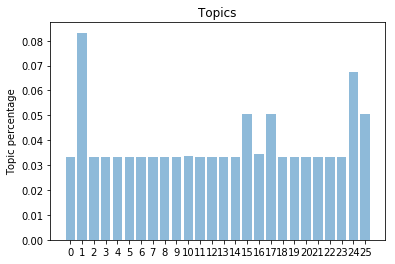

In [90]:
plt.bar(*zip(*topics_of_titles[553]), align='center', alpha=0.5)
plt.ylabel('Topic percentage')
plt.title('Topics')
plt.xticks(np.arange(26))
plt.show()

In [91]:
data[553]

'Identifying Broken Plurals, Irregular Gender, and Rationality in Arabic Text\n'

In [92]:
gensim_model.print_topic(1, topn=15)

'0.070*"system" + 0.060*"linear" + 0.055*"generation" + 0.033*"temporal" + 0.030*"logic" + 0.030*"user" + 0.030*"identify" + 0.028*"programming" + 0.026*"summarization" + 0.026*"dialogue" + 0.019*"evaluate" + 0.018*"program" + 0.017*"attribute" + 0.017*"review" + 0.016*"understand"'

In [66]:
for i in range(26):
    print(gensim_model.print_topic(i, topn=15) + "\n")

0.113*"model" + 0.109*"search" + 0.067*"topic" + 0.050*"local" + 0.041*"space" + 0.033*"policy" + 0.030*"good" + 0.026*"heuristic" + 0.023*"global" + 0.022*"technique" + 0.015*"sit" + 0.013*"satisfiability" + 0.012*"result" + 0.011*"greedy" + 0.010*"prune"

0.070*"system" + 0.060*"linear" + 0.055*"generation" + 0.033*"temporal" + 0.030*"logic" + 0.030*"user" + 0.030*"identify" + 0.028*"programming" + 0.026*"summarization" + 0.026*"dialogue" + 0.019*"evaluate" + 0.018*"program" + 0.017*"attribute" + 0.017*"review" + 0.016*"understand"

0.157*"feature" + 0.074*"selection" + 0.053*"event" + 0.044*"discriminative" + 0.036*"identification" + 0.033*"training" + 0.029*"simple" + 0.028*"question" + 0.026*"classifier" + 0.022*"complex" + 0.021*"source" + 0.021*"answer" + 0.020*"question_answer" + 0.016*"explore" + 0.016*"rich"

0.244*"learning" + 0.074*"efficient" + 0.065*"reinforcement" + 0.065*"multiple" + 0.042*"active" + 0.035*"online" + 0.026*"bayesian" + 0.026*"instance" + 0.025*"semi_sup

In [88]:
id_and_topic = {}
for i in range(len(a)):
    id_and_topic.update({a[i]["id"] : topics_of_titles[i]})

In [91]:
id_and_topic

{'5cdac93dc6d1e08e76d647ff9b50fce62d714190': [(0, 0.14305893),
  (1, 0.06578427),
  (2, 0.01617603),
  (3, 0.013904071),
  (4, 0.017626842),
  (5, 0.012042623),
  (6, 0.0152478395),
  (7, 0.014611957),
  (8, 0.042798653),
  (9, 0.030003985),
  (10, 0.018012775),
  (11, 0.014066911),
  (12, 0.03685725),
  (13, 0.015683731),
  (14, 0.047358442),
  (15, 0.042754494),
  (16, 0.04845037),
  (17, 0.012515036),
  (18, 0.052080397),
  (19, 0.013085888),
  (20, 0.015890593),
  (21, 0.019825855),
  (22, 0.09635624),
  (23, 0.1958068)],
 '478dac375b3dc60be161e2fb5091ac44a247a48a': [(0, 0.033296805),
  (1, 0.059580553),
  (2, 0.032301437),
  (3, 0.022734508),
  (4, 0.060573984),
  (5, 0.025502112),
  (6, 0.039170776),
  (7, 0.024819707),
  (8, 0.06376832),
  (9, 0.021738207),
  (10, 0.020555176),
  (11, 0.039274573),
  (12, 0.13899985),
  (13, 0.022770219),
  (14, 0.034778558),
  (15, 0.0270288),
  (16, 0.01964738),
  (17, 0.032230686),
  (18, 0.089475945),
  (19, 0.05646182),
  (20, 0.056792352),

In [92]:
gensim_model.save("ldamallet_abstracts.model")

In [94]:
import pickle

In [95]:
with open('id_and_topic.pickle', 'wb') as handle:
    pickle.dump(id_and_topic, handle, protocol=pickle.HIGHEST_PROTOCOL)